In [48]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.

In [49]:
# Cargamos y leemos el archivo con los datos

df_central = pd.read_csv("https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv")

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [50]:
# visualizamos el type de variables que tenemos

df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


In [51]:
# Eliminamos columnas que no nos aportan valor y columnas que no tendremos disponibles para la predicción

df_central.drop(['Unnamed: 0', 'f_PREV_HIGH', 'f_PREV_LOW', 'DESVIO'], axis=1, inplace=True)

# Convertimos la columna 'Fecha a Datetime

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Convertimos la columna f_RUN a tipo Boolano para un mejor tratamiento para el imputador

df_central['f_RUN'] = df_central['f_RUN'].astype(bool)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,False,4,False,2021,1,1


In [52]:
# Dividimos df_central en dos Dataframes:
# - df_inicio que contendrá los datos de inicio hasta el 31-10-2023 que utilizaremos para entrenar los modelos de predicción
# - df_final que contendrá los datos del mes de noviembre de 2023 que uilitzaremos para hacer una simulación real de predicción
#   para ver si las predicciones del modelo mejora las previsiones.

df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

In [53]:
# Decidimos eliminar la columna 'Fecha' ya que tenemos columnas específicas que nos marcan el día, mes y año.

df_inicio = df_inicio.drop('Fecha', axis=1)
df_final = df_final.drop('Fecha', axis=1)

In [54]:
df_inicio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24706 entries, 0 to 24705
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Period         24706 non-null  int64  
 1   PREVISION      24706 non-null  float64
 2   E_SIMEL        24706 non-null  float64
 3   f_RUN          24706 non-null  bool   
 4   Dia_Semana     24706 non-null  int64  
 5   Es_fin_semana  24706 non-null  bool   
 6   Año            24706 non-null  int64  
 7   Mes            24706 non-null  int64  
 8   Día            24706 non-null  int64  
dtypes: bool(2), float64(2), int64(5)
memory usage: 1.6 MB


In [55]:
# Excluimos la variable objetivo E_SIMEL del conjunto de entrenamiento y la marcamos como variable objetivo en el conjunto de prueba

# Dividimos los datos en los conjuntos de entrenamiento y prueba

X_inicio = df_inicio.drop('E_SIMEL', axis=1)  
y_inicio = df_inicio['E_SIMEL']  


X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(X_inicio, y_inicio, test_size=0.2, random_state=42)


In [56]:
# Definimos el modelo de RanfomForestRegressor y configuramos el GridSearchCV para la búsqueda de los hiperparámetros que den mejores resultados

rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  # número de árboles
    'max_depth': [10, 20, 30],        # profundidad máxima de los arboles
    }

# el GridSearchCV usará la métrica del error cuadrático medio negativo como criterio de puntuación. Buscamos el MSE menor

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')


grid_search.fit(X_train_inicio, y_train_inicio)


print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores parámetros: {'max_depth': 30, 'n_estimators': 100}
Mejor puntuación: -29.101777899717888


In [57]:
# Creamos el modelo de Random Forest con los mejores Hiperparámetros
rf_optimizado = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42)

# Entrenamos el modelo

rf_optimizado.fit(X_train_inicio, y_train_inicio)


RandomForestRegressor(max_depth=30, random_state=42)

In [58]:
# Hacemos las predicciones del conjunto de prueba y calculamos las métricas MSE y R2

y_pred_test = rf_optimizado.predict(X_test_inicio)

mse_test = mean_squared_error(y_test_inicio, y_pred_test)
r2_test = r2_score(y_test_inicio, y_pred_test)

print("MSE en el conjunto de prueba:", mse_test)
print("R² en el conjunto de prueba:", r2_test)


MSE en el conjunto de prueba: 26.537271938045265
R² en el conjunto de prueba: 0.9069882520718467


In [59]:
# Entrenamos un modelo de RandomForestRegressor para el imputador MICE

estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Creamos el imputador MICE
mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenamos el imputador con todas las columnas menos E_SIMEL

mice_imputer.fit(df_inicio[['Period', 'PREVISION','f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [60]:
# Seleccionamos las dilas del dia 5 del df_final para hacer el tratamiento de la variable f_RUN

df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

df_final_05_11


,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,0.000,False,6,True,2023,11,5
24803,2,0.0,0.000,False,6,True,2023,11,5
24804,3,0.0,0.000,False,6,True,2023,11,5
24805,4,0.0,0.000,False,6,True,2023,11,5
24806,5,0.0,0.000,False,6,True,2023,11,5
24807,6,0.0,0.000,False,6,True,2023,11,5
24808,7,0.0,0.000,False,6,True,2023,11,5
24809,8,0.0,0.000,False,6,True,2023,11,5
24810,9,0.0,0.000,False,6,True,2023,11,5
24811,10,0.0,0.000,False,6,True,2023,11,5


In [61]:
df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar

,Period,PREVISION,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,False,6,True,2023,11,5
24803,2,0.0,False,6,True,2023,11,5
24804,3,0.0,False,6,True,2023,11,5
24805,4,0.0,False,6,True,2023,11,5
24806,5,0.0,False,6,True,2023,11,5
24807,6,0.0,False,6,True,2023,11,5
24808,7,0.0,False,6,True,2023,11,5
24809,8,0.0,False,6,True,2023,11,5
24810,9,0.0,False,6,True,2023,11,5
24811,10,0.0,False,6,True,2023,11,5


In [62]:
df_final_05_11_para_imputar[['f_RUN']] = np.nan  # Primero convertimos la columna f_RUN a NaN

df_final_05_11_para_imputar

,Period,PREVISION,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,NaN,6,True,2023,11,5
24803,2,0.0,NaN,6,True,2023,11,5
24804,3,0.0,NaN,6,True,2023,11,5
24805,4,0.0,NaN,6,True,2023,11,5
24806,5,0.0,NaN,6,True,2023,11,5
24807,6,0.0,NaN,6,True,2023,11,5
24808,7,0.0,NaN,6,True,2023,11,5
24809,8,0.0,NaN,6,True,2023,11,5
24810,9,0.0,NaN,6,True,2023,11,5
24811,10,0.0,NaN,6,True,2023,11,5


In [63]:
# En la variable creada para la imputación, predecimos los valores para las columnas siguientes

valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados

array([[1.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [2.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [3.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [4.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [5.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [6.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.00000000e+00],
       [7.00000000e+00, 0.00000000e+00, 4.16666667e-04, 6.00000000e+00,
        1.00000000e+00, 2.02300000e+03, 1.10000000e+01, 5.

In [64]:
# Realmente solo queremos imputar la columna f_RUN, por lo tanto cogemos solo los valores imputados a la columna en concreto

valores_imputados_f_RUN = valores_imputados[:, 2]
valores_imputados_f_RUN


array([0.00041667, 0.00041667, 0.00041667, 0.00041667, 0.00041667,
       0.00041667, 0.00041667, 0.00041667, 0.05341624, 0.10496165,
       0.15435997, 0.16643332, 0.15673016, 0.16145759, 0.20498781,
       0.23107072, 0.21109272, 0.2017212 , 0.19875385, 0.10707328,
       0.11100494, 0.05794581, 0.02674855, 0.02549855])

In [65]:
# Creamos un umbral del 0.2 para que convierta los valores por debajo en False y por arriba en True

valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)

valores_imputados_f_RUN_boolean

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False])

In [66]:
# Actualizamos solo la columna f_RUN con las imputaciones en el df_final_05 que utilizaremos para la predicción

df_final_05_11.loc[df_final_05_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean




In [67]:
df_final_05_11

,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,0.000,False,6,True,2023,11,5
24803,2,0.0,0.000,False,6,True,2023,11,5
24804,3,0.0,0.000,False,6,True,2023,11,5
24805,4,0.0,0.000,False,6,True,2023,11,5
24806,5,0.0,0.000,False,6,True,2023,11,5
24807,6,0.0,0.000,False,6,True,2023,11,5
24808,7,0.0,0.000,False,6,True,2023,11,5
24809,8,0.0,0.000,False,6,True,2023,11,5
24810,9,0.0,0.000,False,6,True,2023,11,5
24811,10,0.0,0.000,False,6,True,2023,11,5


In [68]:
# Preparar para la predicción exluyendo E_SIMEL
caracteristicas_para_prediccion = df_final_05_11.drop('E_SIMEL', axis=1)  
caracteristicas_para_prediccion


,Period,PREVISION,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,False,6,True,2023,11,5
24803,2,0.0,False,6,True,2023,11,5
24804,3,0.0,False,6,True,2023,11,5
24805,4,0.0,False,6,True,2023,11,5
24806,5,0.0,False,6,True,2023,11,5
24807,6,0.0,False,6,True,2023,11,5
24808,7,0.0,False,6,True,2023,11,5
24809,8,0.0,False,6,True,2023,11,5
24810,9,0.0,False,6,True,2023,11,5
24811,10,0.0,False,6,True,2023,11,5


In [69]:
# Predicción de la variable objetivi E_SIMEL

predicted_e_simel_05_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_05_11 = np.maximum(predicted_e_simel_05_11, 0)

predicted_e_simel_05_11

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  9.37421, 10.1487 , 15.36659, 11.65582,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ])

In [70]:
# Creamos un Dataframe para poder visualizar y comparar las predicciones, previsiones y produccion real, y otros datos relevantes.

df_predicciones_05_11 = df_final_05_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_05_11['predicted_E_SIMEL'] = predicted_e_simel_05_11


df_predicciones_05_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24802,2023,11,5,0.0,0.000,0.00000
24803,2023,11,5,0.0,0.000,0.00000
24804,2023,11,5,0.0,0.000,0.00000
24805,2023,11,5,0.0,0.000,0.00000
24806,2023,11,5,0.0,0.000,0.00000
24807,2023,11,5,0.0,0.000,0.00000
24808,2023,11,5,0.0,0.000,0.00000
24809,2023,11,5,0.0,0.000,0.00000
24810,2023,11,5,0.0,0.000,0.00000
24811,2023,11,5,0.0,0.000,0.00000


In [71]:
# Calculamos los sumatorios de las predicciones, previsiones y producción real para sacar los porcentajes de desviación

suma_real = df_predicciones_05_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_05_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_05_11['PREVISION'].sum()

# Desviación de la predicción

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # En caso de división por cero nos devuelve un carácter especial para que no nos dé error


# Desviación de la previsión
    
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')   # En caso de división por cero nos devuelve un carácter especial para que no nos dé error

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  15.937000000000001
Suma predicha:  46.54531999999997
Desviación porcentual:  192.05822927778104 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [72]:
# Actualizamos df_inicio con los datos del dia 5 del df_final para reentrenar los modelos de predicción e imputación

datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [73]:
# Selección de los datos del día 6 y preparación para la imputación y reentreno de los modelos

df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_06_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['f_RUN']] = np.nan 

valores_imputados_06 = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados_f_RUN_06 = valores_imputados[:, 2]  

valores_imputados_f_RUN_boolean_06 = np.where(valores_imputados_f_RUN_06 > 0.2, True, False)

df_final_06_11.loc[df_final_06_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_06


# Preparamos los datos para la predicción de E_SIMEL para el dia 06-11-2023

caracteristicas_para_prediccion = df_final_06_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_06_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_06_11 = np.maximum(predicted_e_simel_06_11, 0)

# Creamos el nuevo Dataframe con los resultados de la predicción i demás variables relevantes

df_predicciones_06_11 = df_final_06_11[['Año', 'Mes', 'Día', 'PREVISION', 'f_RUN','E_SIMEL']].copy()

df_predicciones_06_11['predicted_E_SIMEL'] = predicted_e_simel_06_11


df_predicciones_06_11.head(30)

,Año,Mes,Día,PREVISION,f_RUN,E_SIMEL,predicted_E_SIMEL
24826,2023,11,6,0.0,False,0.000,0.00000
24827,2023,11,6,0.0,False,0.000,0.00000
24828,2023,11,6,0.0,False,0.000,0.00000
24829,2023,11,6,0.0,False,0.000,0.00000
24830,2023,11,6,0.0,False,0.000,0.00000
24831,2023,11,6,0.0,False,0.000,0.00000
24832,2023,11,6,0.0,False,0.000,0.00000
24833,2023,11,6,0.0,False,0.000,0.00000
24834,2023,11,6,0.0,False,0.000,0.00000
24835,2023,11,6,0.0,False,0.000,0.00000


In [74]:
# Sumatorio y procentajes de desviación

suma_real = df_predicciones_06_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_06_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_06_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  


if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  95.50424999999998
Desviación porcentual:  63.13800348467764 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [75]:
# Creamos un función para agilizar el proceso de actualización, reentreno de los modelos, imputación, predicción y cálculo de las métricas

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, mes, año, df_inicio_actualizado, df_final, modelo_rf, imputador):
    """
    Argumentos:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente (int): Datos del día que queremos hacer la predición
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_rf (RadnomForestRegressor): Modelo Random Forest entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Actualización de df_actualizado con los datos de dia_actual

    datos_dia_actual = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_rf.fit(X_train_actualizado, y_train_actualizado)
    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # Imputación de valores a la columna f_RUN

    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['f_RUN']] = np.nan  
    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)
    
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  

    # Preparación para la predicción y realizarla

    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = modelo_rf.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Dataframe con los resultados con elección de algunas columnas

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Cálculo de las métricas
    
    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [76]:
# Llamamos a la función

dia_actual = 6  # Actualización de datos con los que reentrenamos los modelos
dia_siguiente = 7  # Preparación de datos para la imputación y predicción

df_predicciones_07_11, df_inicio_actualizado, mse_07_11, r2_07_11, mae_07_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_07_11, "R²:", r2_07_11, "MAE:", mae_07_11)

MSE: 40.26895146692082 R²: -0.010225867233931929 MAE: 3.297295416666666


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [77]:
# Sumatorios y procentajes

suma_real = df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_07_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_07_11['PREVISION'].sum()

# Desviación porcentual de la predicción

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  


# Descviación porcentual de la previsión
    
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  60.89539
Desviación porcentual:  -10.421609296852004 %
Suma previsión:  24.0
Desviación porcentual:  -64.6954986760812 %


In [78]:
# Llamamos a la función. Actualización de datos reales del día 7 para reentrenar los modelos
# Preparación de los datos del día posterior, en este caso del día 8, para la imputación y predicción

dia_actual = 7  
dia_siguiente = 8  

df_predicciones_08_11, df_inicio_actualizado, mse_08_11, r2_08_11, mae_08_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_08_11, "R²:", r2_08_11, "MAE:", mae_08_11)

MSE: 3.2590745416666667 R²: -0.07294345232984711 MAE: 0.4707083333333333


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [79]:
# Sumatorios y procentajes

suma_real = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_08_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_08_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  11.296999999999999
Suma predicha:  0.0
Desviación porcentual:  -100.0 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [80]:
# Seguimos con el mismo proceso anterior. Llamamos a la función con los días específicos que queremos actualizar, imputar y predecir.

dia_actual = 8  
dia_siguiente = 9  

df_predicciones_09_11, df_inicio_actualizado, mse_09_11, r2_09_11, mae_09_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_09_11, "R²:", r2_09_11, "MAE:", mae_09_11)

MSE: 30.368411164054166 R²: 0.6752762149329774 MAE: 2.3356970833333337


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [81]:
# Sumatorios y procentajes

suma_real = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_09_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_09_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  108.60970999999998
Desviación porcentual:  6.025859796753093 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [82]:
# Llamamos a la función

dia_actual = 9  
dia_siguiente = 10 

df_predicciones_10_11, df_inicio_actualizado, mse_10_11, r2_10_11, mae_10_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_10_11, "R²:", r2_10_11, "MAE:", mae_10_11)

MSE: 23.096168384350005 R²: 0.04710676972305716 MAE: 2.3225833333333328


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [83]:
# Sumatorios y procentajes

suma_real = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_10_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_10_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  111.2414
Desviación porcentual:  88.68866084301587 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [84]:
# Llamamos a la función

dia_actual = 10  
dia_siguiente = 13  

df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

MSE: 63.235188257075 R²: 0.27521019820706083 MAE: 3.130529166666667


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [85]:
# Sumatorios y procentajes

suma_real = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_13_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_13_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  32.008300000000006
Desviación porcentual:  -70.12506883452646 %
Suma previsión:  20.900000000000002
Desviación porcentual:  -80.492995211917 %


In [86]:
# # Llamamos a la función

dia_actual = 13  
dia_siguiente = 14 

df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)

MSE: 19.90889279892919 R²: 0.7885355179747731 MAE: 1.9353795833333347


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [87]:
# Sumatorios y procentajes

suma_real = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_14_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  #

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  103.13656999999998
Desviación porcentual:  -8.185122539637332 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [88]:
# Llamamos a la función

dia_actual = 14  
dia_siguiente = 15  
df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

MSE: 71.11164370824167 R²: -0.390233623607644 MAE: 4.572164166666667


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108868\3392885044.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [89]:
# Sumatorios y procentajes

suma_real = df_predicciones_15_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_15_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_15_11['PREVISION'].sum()

if suma_real != 0:
    desviacion_porcentual = 100 * (suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  



if suma_real != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  121.99513999999995
Desviación porcentual:  38.10822682349739 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [90]:
# Concatenamos todos los Dataframes que contienen las prediccions, previsiones y datos reales para calcular las méstricas en conjunto

df_predicciones_totales = pd.concat([df_predicciones_05_11, df_predicciones_06_11, df_predicciones_07_11, df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, df_predicciones_13_11, df_predicciones_14_11, df_predicciones_15_11])



In [91]:
# Cálculo de las métricas para ver si nos indican si mejoran los errores entren la predicción (predicted_E_SIMEL), previsión (PREVISION)y producción real(E_SIMEL)

def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['predicted_E_SIMEL'])
    return mae, mse, r2

# Métricas para la predicciones

mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)

# Cambiamos la columna de predicción por la de previsión

df_previsiones = df_predicciones_totales.copy()
df_previsiones['predicted_E_SIMEL'] = df_previsiones['PREVISION']

# Métricas para la previsión

mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)

# Visualizamos los resultados

print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)

MAE Predicciones:  2.326625648148148
MSE Predicciones:  31.939550397612038
R² Predicciones:  0.3685043312959956
MAE Previsiones:  2.3999490740740743
MSE Previsiones:  35.93822944907407
R² Previsiones:  0.2894440918718205


In [92]:
"""
Las tres métricas nos indican que las predicciones sacan ligeramente mejores resultados. Las predicciones resultan con una desviación menor MAE, un MSE más bajo lo que nos
indica que los errores son más pequeños que los de la previsión y el r2 de las predicciones es más cercano al 1 lo que nos indica que el modelo explica mejor los datos que
el de las previsiones.
"""

'\nLas tres métricas nos indican que las predicciones sacan ligeramente mejores resultados. Las predicciones resultan con una desviación menor MAE, un MSE más bajo lo que nos\nindica que los errores son más pequeños que los de la previsión y el r2 de las predicciones es más cercano al 1 lo que nos indica que el modelo explica mejor los datos que\nel de las previsiones.\n'

In [93]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['predicted_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = sumas_previsiones - suma_e_simel


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")

diferencia = diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {-diferencia}, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")

Suma de los valores en la columna E_SIMEL: 622.953
Suma de las predicciones: 679.93608
Suma de las previsiones : 696.6
Diferencia entre predicciones totales y E_SIMEL total: 56.98307999999997
Diferencia entre previsiones y E_SIMEL total: 73.64700000000005
La predicción es MEJOR que la previsión en: 16.663920000000076, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


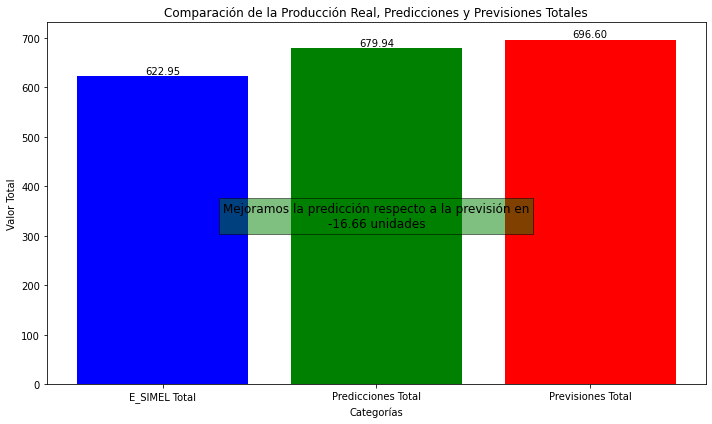

In [94]:
# Valores que cogemos para el gráfico

categorias = ['E_SIMEL Total', 'Predicciones Total', 'Previsiones Total']
valores = [suma_e_simel, sumas_totales_predicciones, sumas_previsiones]

# Creamos un gráfico de barras

plt.figure(figsize=(10, 6))
barra = plt.bar(categorias, valores, color=['blue', 'green', 'red'])

# Añadimos las etiqutas

for rect in barra:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Título del gráfico y ponemos las etiquteas a cada barra
    
plt.title('Comparación de la Producción Real, Predicciones y Previsiones Totales')
plt.xlabel('Categorías')
plt.ylabel('Valor Total')


# Ubicamos el texto de la diferencia

pos_y = valores[1] / 2
pos_x = categorias[1]
plt.text(pos_x, pos_y, f'Mejoramos la predicción respecto a la previsión en\n{diferencia:.2f} unidades', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='green', alpha=0.5))
plt.tight_layout()
plt.show()